In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# import gmaps
import gmaps
# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68355746dc15697c0fecdafdecf88a0b


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


613

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | itoman
Processing Record 3 of Set 1 | barinas
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | nisia floresta
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | kallifonion
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | sola
Processing Record 17 of Set 1 | tabou
Processing Record 18 of Set 1 | visp
Processing Record 19 of Set 1 | kentville
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | ancud
Processing Record 23 of Se

Processing Record 41 of Set 4 | takoradi
Processing Record 42 of Set 4 | mercedes
Processing Record 43 of Set 4 | kruglolesskoye
Processing Record 44 of Set 4 | zhezkazgan
Processing Record 45 of Set 4 | nelson bay
Processing Record 46 of Set 4 | erie
Processing Record 47 of Set 4 | bay city
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | pacific grove
Processing Record 1 of Set 5 | samusu
City not found. Skipping...
Processing Record 2 of Set 5 | west plains
Processing Record 3 of Set 5 | ahuimanu
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | goundi
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | taoudenni
Processing Record 8 of Set 5 | baculin
Processing Record 9 of Set 5 | bairiki
Processing Record 10 of Set 5 | riberalta
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | corralillo
Processing Record 13 of Set 5 | saldanha
Processing Record 14 of S

Processing Record 25 of Set 8 | novikovo
Processing Record 26 of Set 8 | aguazul
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | bathsheba
Processing Record 29 of Set 8 | arti
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | novobirilyussy
Processing Record 32 of Set 8 | khandbari
Processing Record 33 of Set 8 | haines junction
Processing Record 34 of Set 8 | saint anthony
Processing Record 35 of Set 8 | malwan
City not found. Skipping...
Processing Record 36 of Set 8 | amarante do maranhao
Processing Record 37 of Set 8 | parintins
Processing Record 38 of Set 8 | lagoa
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | sobolevo
Processing Record 41 of Set 8 | havelock
Processing Record 42 of Set 8 | grand gaube
Processing Record 43 of Set 8 | roma
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | ulaanbaatar
Processing Record 46 of Set 8 | magdalena
Processing Record 47 o

Processing Record 13 of Set 12 | gravina in puglia
Processing Record 14 of Set 12 | katima mulilo
Processing Record 15 of Set 12 | shache
Processing Record 16 of Set 12 | jeremie
Processing Record 17 of Set 12 | lavumisa
Processing Record 18 of Set 12 | manado
Processing Record 19 of Set 12 | vila franca do campo
Processing Record 20 of Set 12 | santa rosa
Processing Record 21 of Set 12 | lavrentiya
Processing Record 22 of Set 12 | bayangol
Processing Record 23 of Set 12 | leiyang
Processing Record 24 of Set 12 | khlevnoye
Processing Record 25 of Set 12 | divnomorskoye
Processing Record 26 of Set 12 | talaja
Processing Record 27 of Set 12 | general roca
Processing Record 28 of Set 12 | outlook
Processing Record 29 of Set 12 | taybad
Processing Record 30 of Set 12 | larreynaga
Processing Record 31 of Set 12 | birnin kebbi
Processing Record 32 of Set 12 | fuente de oro
Processing Record 33 of Set 12 | ngunguru
Processing Record 34 of Set 12 | vao
Processing Record 35 of Set 12 | rocha
Pr

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itoman,26.1247,127.6694,62.62,48,75,18.41,JP,2021-12-18 22:20:11
1,Barinas,8.6226,-70.2075,89.64,43,81,4.61,VE,2021-12-18 22:20:11
2,Fairbanks,64.8378,-147.7164,12.16,82,90,0.00,US,2021-12-18 22:16:02
3,Nisia Floresta,-6.0911,-35.2086,83.21,76,58,7.34,BR,2021-12-18 22:20:12
4,Luderitz,-26.6481,15.1594,60.73,81,0,6.40,NA,2021-12-18 22:20:12
5,Nome,64.5011,-165.4064,17.67,93,90,5.75,US,2021-12-18 22:20:12
6,Albany,42.6001,-73.9662,36.81,92,100,1.01,US,2021-12-18 22:20:13
7,Clyde River,70.4692,-68.5914,1.63,85,90,16.11,CA,2021-12-18 22:20:13
8,Rikitea,-23.1203,-134.9692,77.54,76,85,7.38,PF,2021-12-18 22:20:13
9,Geraldton,-28.7667,114.6000,57.61,94,1,2.30,AU,2021-12-18 22:20:14


In [8]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Itoman,JP,2021-12-18 22:20:11,26.1247,127.6694,62.62,48,75,18.41
1,Barinas,VE,2021-12-18 22:20:11,8.6226,-70.2075,89.64,43,81,4.61
2,Fairbanks,US,2021-12-18 22:16:02,64.8378,-147.7164,12.16,82,90,0.00
3,Nisia Floresta,BR,2021-12-18 22:20:12,-6.0911,-35.2086,83.21,76,58,7.34
4,Luderitz,NA,2021-12-18 22:20:12,-26.6481,15.1594,60.73,81,0,6.40
5,Nome,US,2021-12-18 22:20:12,64.5011,-165.4064,17.67,93,90,5.75
6,Albany,US,2021-12-18 22:20:13,42.6001,-73.9662,36.81,92,100,1.01
7,Clyde River,CA,2021-12-18 22:20:13,70.4692,-68.5914,1.63,85,90,16.11
8,Rikitea,PF,2021-12-18 22:20:13,-23.1203,-134.9692,77.54,76,85,7.38
9,Geraldton,AU,2021-12-18 22:20:14,-28.7667,114.6000,57.61,94,1,2.30


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


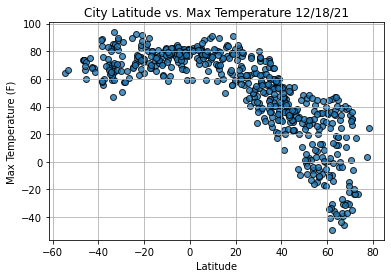

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.gca().invert_yaxis()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

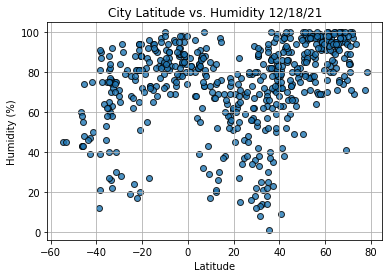

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


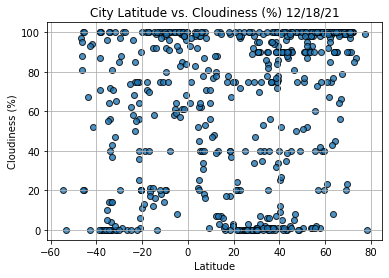

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

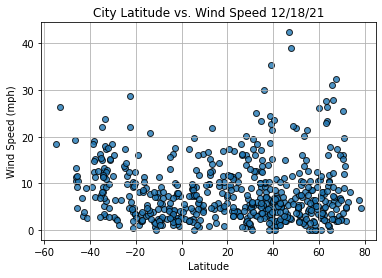

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13=city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2021-12-18 22:20:15
Lat                      -34.4187
Lng                       19.2345
Max Temp                     66.9
Humidity                       81
Cloudiness                     14
Wind Speed                  11.52
Name: 13, dtype: object

In [17]:
city_data_df["Lat"]>= 0

0       True
1       True
2       True
3      False
4      False
       ...  
559     True
560    False
561     True
562    False
563     True
Name: Lat, Length: 564, dtype: bool

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Itoman,JP,2021-12-18 22:20:11,26.1247,127.6694,62.62,48,75,18.41
1,Barinas,VE,2021-12-18 22:20:11,8.6226,-70.2075,89.64,43,81,4.61
2,Fairbanks,US,2021-12-18 22:16:02,64.8378,-147.7164,12.16,82,90,0.00
5,Nome,US,2021-12-18 22:20:12,64.5011,-165.4064,17.67,93,90,5.75
6,Albany,US,2021-12-18 22:20:13,42.6001,-73.9662,36.81,92,100,1.01


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

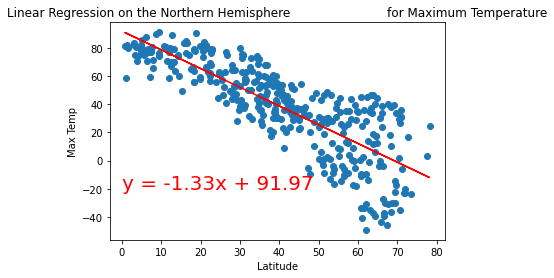

y = -1.33x + 91.97
The r-value is: -0.818


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

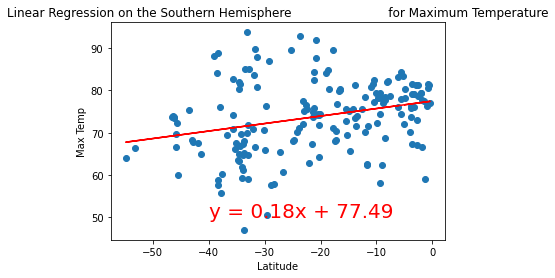

y = 0.18x + 77.49
The r-value is: 0.286


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

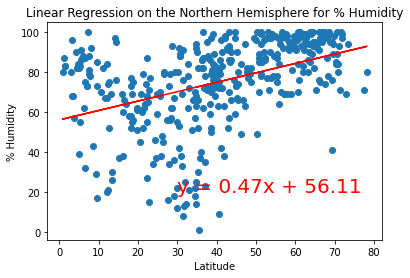

The r-value is: 0.286


In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(30,20))

print(f"The r-value is: {r_value:.3f}")



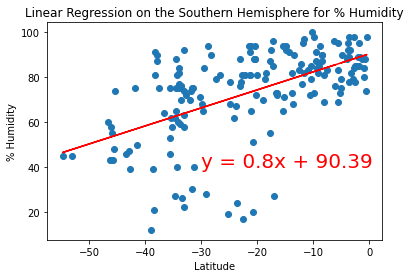

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,40))


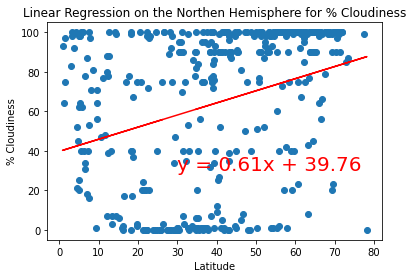

In [24]:
# Linear regression on the Northen Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northen Hemisphere for % Cloudiness','% Cloudiness',(30,30))


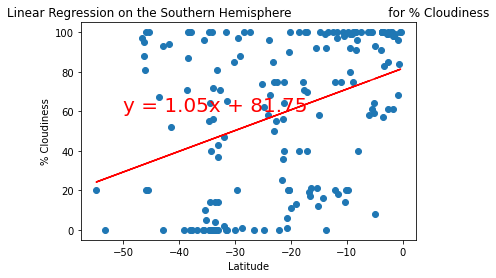

slope is:1.050,intercept is:81.752,r_value is:0.375,P_value is : 0.000,Standard Error is :0.198


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
print(f"slope is:{slope:.3f},intercept is:{intercept:.3f},r_value is:{r_value:.3f},P_value is : {p_value:.3f},Standard Error is :{std_err:.3f}")

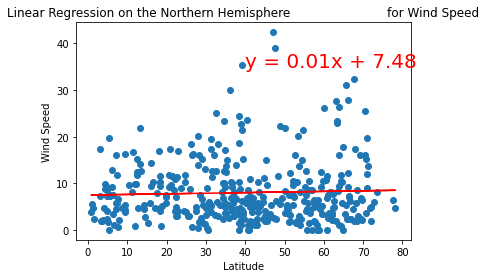

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

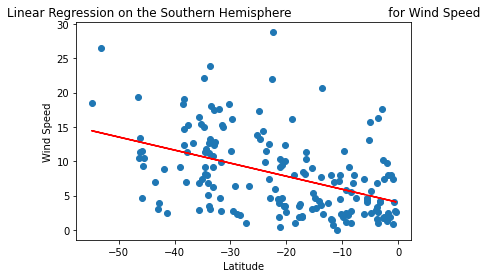

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [28]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
import ipywidgets as widgets

# Import the API key.
from config import gkey

In [29]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Itoman,JP,2021-12-18 22:20:11,26.1247,127.6694,62.62,48,75,18.41
1,1,Barinas,VE,2021-12-18 22:20:11,8.6226,-70.2075,89.64,43,81,4.61
2,2,Fairbanks,US,2021-12-18 22:16:02,64.8378,-147.7164,12.16,82,90,0.00
3,3,Nisia Floresta,BR,2021-12-18 22:20:12,-6.0911,-35.2086,83.21,76,58,7.34
4,4,Luderitz,NaN,2021-12-18 22:20:12,-26.6481,15.1594,60.73,81,0,6.40


In [30]:
# get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [31]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

In [32]:
# # 1. Assign the locations to an array of latitude and longitude pairs.
# locations = [latitude, longitude]
# # 2. Assign the weights variable to some values.
# temperatures = # an array of length equal to the locations array length
# # 3. Assign the figure variable to the gmaps.figure() attribute.
# fig = gmaps.figure()
# # 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
# heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# # 5. Add the heatmap layer.
# fig.add_layer(heatmap_layer)
# # 6. Call the figure to plot the data.
# fig

In [33]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [34]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
gmaps.__version__

'0.9.0'

In [36]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [37]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [41]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Barinas,VE,2021-12-18 22:20:11,8.6226,-70.2075,89.64,43,81,4.61
3,3,Nisia Floresta,BR,2021-12-18 22:20:12,-6.0911,-35.2086,83.21,76,58,7.34
8,8,Rikitea,PF,2021-12-18 22:20:13,-23.1203,-134.9692,77.54,76,85,7.38
14,14,Sola,VU,2021-12-18 22:20:16,-13.8833,167.5500,81.21,73,99,7.74
15,15,Tabou,CI,2021-12-18 22:20:16,4.4230,-7.3528,80.82,82,21,8.88
26,26,Coxim,BR,2021-12-18 22:18:31,-18.5067,-54.7600,80.33,82,100,1.01
32,32,Atuona,PF,2021-12-18 22:20:21,-9.8000,-139.0333,78.22,73,20,11.43
34,34,Biak,ID,2021-12-18 22:20:22,-0.9131,122.8766,76.23,84,96,0.81
37,37,Mar Del Plata,AR,2021-12-18 22:19:11,-38.0023,-57.5575,76.08,87,0,7.00
38,38,Tual,ID,2021-12-18 22:20:23,-5.6667,132.7500,84.45,69,100,4.32


In [42]:
preferred_cities_df.count()

City_ID       138
City          138
Country       138
Date          138
Lat           138
Lng           138
Max Temp      138
Humidity      138
Cloudiness    138
Wind Speed    138
dtype: int64

In [43]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Barinas,VE,89.64,8.6226,-70.2075,
3,Nisia Floresta,BR,83.21,-6.0911,-35.2086,
8,Rikitea,PF,77.54,-23.1203,-134.9692,
14,Sola,VU,81.21,-13.8833,167.5500,
15,Tabou,CI,80.82,4.4230,-7.3528,
26,Coxim,BR,80.33,-18.5067,-54.7600,
32,Atuona,PF,78.22,-9.8000,-139.0333,
34,Biak,ID,76.23,-0.9131,122.8766,
37,Mar Del Plata,AR,76.08,-38.0023,-57.5575,
38,Tual,ID,84.45,-5.6667,132.7500,


In [44]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": gkey
}

In [46]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import gkey

In [48]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": gkey,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEBOPWvMW1HWUiwzEsRT64GfViHktXa4pYlH9Y8bc3X-mBjr4Lwq2Dew1xx38uJ_DZCFgZQ-oel7i4G1lOBw1XvwqGO3jE7dD_MXwt66aDPixYuz8ZrFeK2ZY2vuCwYTTNu5sv_w7kKpznV1begt2ziWW7qZJtPA7ENHoPDSq_R1nB1kqCXkWj9tPnRxGf_19SjUbv_3k8tOsKXOmxPla2KRi0Ez4itH4DzuBs1FHvnS3zSDFcMLoItzjOQesy-4KniUMmFBaKSMkDRqjhS1nn-c_TZw7rUG0gRLcItGjmWVgFJNbJG7wM3oLQ2ypfzTAaE8PfsgG0Gica1VKAQrOLB-2vd6Vjokqyx0RPtBuWd_uNlzabePC4T0KdeBmEdWW544Ezz5VWc2bCEzlArO2FV2RcZnnkyy_2nck_FrDk5A6N1bK_lnKo5x',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [66]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found...skipping.")
        

Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.
Hotel not found...skipping.


In [67]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Barinas,VE,89.64,8.6226,-70.2075,Hotel Mastranto Suite
3,Nisia Floresta,BR,83.21,-6.0911,-35.2086,Rancho Crepusculo
8,Rikitea,PF,77.54,-23.1203,-134.9692,People ThankYou
14,Sola,VU,81.21,-13.8833,167.5500,Leumerus Bungalows
15,Tabou,CI,80.82,4.4230,-7.3528,hotêl doufoulougou
26,Coxim,BR,80.33,-18.5067,-54.7600,Hotel Avenida
32,Atuona,PF,78.22,-9.8000,-139.0333,Villa Enata
34,Biak,ID,76.23,-0.9131,122.8766,Penginapan Kim
37,Mar Del Plata,AR,76.08,-38.0023,-57.5575,Gran Hotel Mar del Plata
38,Tual,ID,84.45,-5.6667,132.7500,Grand Vilia Hotel


In [68]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [69]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [71]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [72]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [73]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))